In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading datasets from data/ folder
from pathlib import Path

data_dir = Path("data")
csv_files = sorted(data_dir.glob("*.csv"))

def short_name(stem):
    parts = stem.split("_")
    if len(parts) >= 3:
        return f"{parts[0]}_{parts[-1]}"
    return stem

datasets = {}
for path in csv_files:
    name = short_name(path.stem)
    datasets[name] = pd.read_csv(path)

# Convenience variables
binance_usd = datasets.get("binance_usd")
binance_eur = datasets.get("binance_eur")
binance_usdc = datasets.get("binance_usdc")

kraken_usd = datasets.get("kraken_usd")
kraken_eur = datasets.get("kraken_eur")
kraken_usdc = datasets.get("kraken_usdc")

print("Loaded datasets:", ", ".join(datasets.keys()))


Loaded datasets: binance_eur, binance_usd, binance_usdc, kraken_eur, kraken_usd, kraken_usdc


In [3]:
# Converting timestamps and sorting
for name, df in datasets.items():
    if name.startswith("kraken_"):
        df["timestamp"] = pd.to_datetime(df["datetime_utc"])
    else:
        df["timestamp"] = pd.to_datetime(df["timestamp"])
    df.sort_values("timestamp", inplace=True)
    df.reset_index(drop=True, inplace=True)

for name, df in datasets.items():
    print(f"{name}")
    print(df.dtypes)


binance_eur
symbol                                 object
timestamp                 datetime64[ns, UTC]
open                                  float64
high                                  float64
low                                   float64
close                                 float64
volume                                float64
quote_volume                          float64
n_trades                                int64
taker_buy_base_volume                 float64
taker_buy_quote_volume                float64
open_time_ms                            int64
close_time_ms                           int64
dtype: object
binance_usd
symbol                                 object
timestamp                 datetime64[ns, UTC]
open                                  float64
high                                  float64
low                                   float64
close                                 float64
volume                                float64
quote_volume                          floa

In [4]:
# Peforming summary statistics
summary_stats = {}

for name, df in datasets.items():
    summary_stats[name] = df.describe()

for name, stats in summary_stats.items():
    print(f"\nSummary statistics for {name}")
    print(stats)


Summary statistics for binance_eur
               open          high           low         close        volume  \
count  30240.000000  30240.000000  30240.000000  30240.000000  30240.000000   
mean   22331.577046  22344.539559  22318.656312  22331.667692      2.799394   
std     2292.266348   2295.873087   2288.721312   2292.327998      3.956195   
min    18618.000000  18658.530000  18603.300000  18618.000000      0.000530   
25%    20986.430000  20995.540000  20978.667500  20987.002500      0.654262   
50%    21417.655000  21431.090000  21404.890000  21416.600000      1.535050   
75%    23650.180000  23666.612500  23632.427500  23650.025000      3.365663   
max    26868.970000  26906.960000  26806.020000  26850.000000     83.969160   

       quote_volume      n_trades  taker_buy_base_volume  \
count  3.024000e+04  30240.000000           30240.000000   
mean   6.307387e+04    143.685351               1.423146   
std    8.972945e+04    138.666690               2.143191   
min    1.094

In [5]:
# Checking for missing values
for name, df in datasets.items():
    print(f"\nNaN counts for {name}")
    print(df.isna().sum())

for name, df in datasets.items():
    missing_rows = df[df.isna().any(axis=1)]
    print(f"{name}: {len(missing_rows)} rows with missing values")


NaN counts for binance_eur
symbol                    0
timestamp                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
quote_volume              0
n_trades                  0
taker_buy_base_volume     0
taker_buy_quote_volume    0
open_time_ms              0
close_time_ms             0
dtype: int64

NaN counts for binance_usd
symbol                    0
timestamp                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
quote_volume              0
n_trades                  0
taker_buy_base_volume     0
taker_buy_quote_volume    0
open_time_ms              0
close_time_ms             0
dtype: int64

NaN counts for binance_usdc
symbol                    0
timestamp                 0
open                      0
high                      0
low                       0
close                

In [6]:
# Checking for timestamp gaps
EXPECTED_FREQ = pd.Timedelta(minutes=1)

for name, df in datasets.items():
    print(f"\nTimestamp gaps for {name}:", end=" ")

    df = df.copy()
    df["time_diff"] = df["timestamp"].diff()

    gap_rows = df[df["time_diff"] > EXPECTED_FREQ]

    total_missing = 0

    for _, row in gap_rows.iterrows():
        gap = row["time_diff"]
        missing_count = int(gap / EXPECTED_FREQ) - 1
        total_missing += missing_count

    print(total_missing)

    if gap_rows.empty:
        print("No abnormal timestamp gaps detected.")
    else:
        for _, row in gap_rows.iterrows():
            prev_ts = df.loc[row.name - 1, "timestamp"]
            curr_ts = row["timestamp"]

# UNCOMMENT THIS BLOCK TO PRINT DETAILS OF GAPS
            print(
                f"Gap of {row['time_diff']} "
                f"between {prev_ts} and {curr_ts}"
            )


Timestamp gaps for binance_eur: 0
No abnormal timestamp gaps detected.

Timestamp gaps for binance_usd: 0
No abnormal timestamp gaps detected.

Timestamp gaps for binance_usdc: 0
No abnormal timestamp gaps detected.

Timestamp gaps for kraken_eur: 111
Gap of 0 days 00:02:00 between 2023-03-01 03:10:00+00:00 and 2023-03-01 03:12:00+00:00
Gap of 0 days 00:02:00 between 2023-03-01 03:47:00+00:00 and 2023-03-01 03:49:00+00:00
Gap of 0 days 00:02:00 between 2023-03-02 00:51:00+00:00 and 2023-03-02 00:53:00+00:00
Gap of 0 days 00:02:00 between 2023-03-02 02:38:00+00:00 and 2023-03-02 02:40:00+00:00
Gap of 0 days 00:02:00 between 2023-03-02 02:53:00+00:00 and 2023-03-02 02:55:00+00:00
Gap of 0 days 00:02:00 between 2023-03-02 03:34:00+00:00 and 2023-03-02 03:36:00+00:00
Gap of 0 days 00:02:00 between 2023-03-02 04:17:00+00:00 and 2023-03-02 04:19:00+00:00
Gap of 0 days 00:03:00 between 2023-03-04 01:52:00+00:00 and 2023-03-04 01:55:00+00:00
Gap of 0 days 00:02:00 between 2023-03-04 03:06:00+

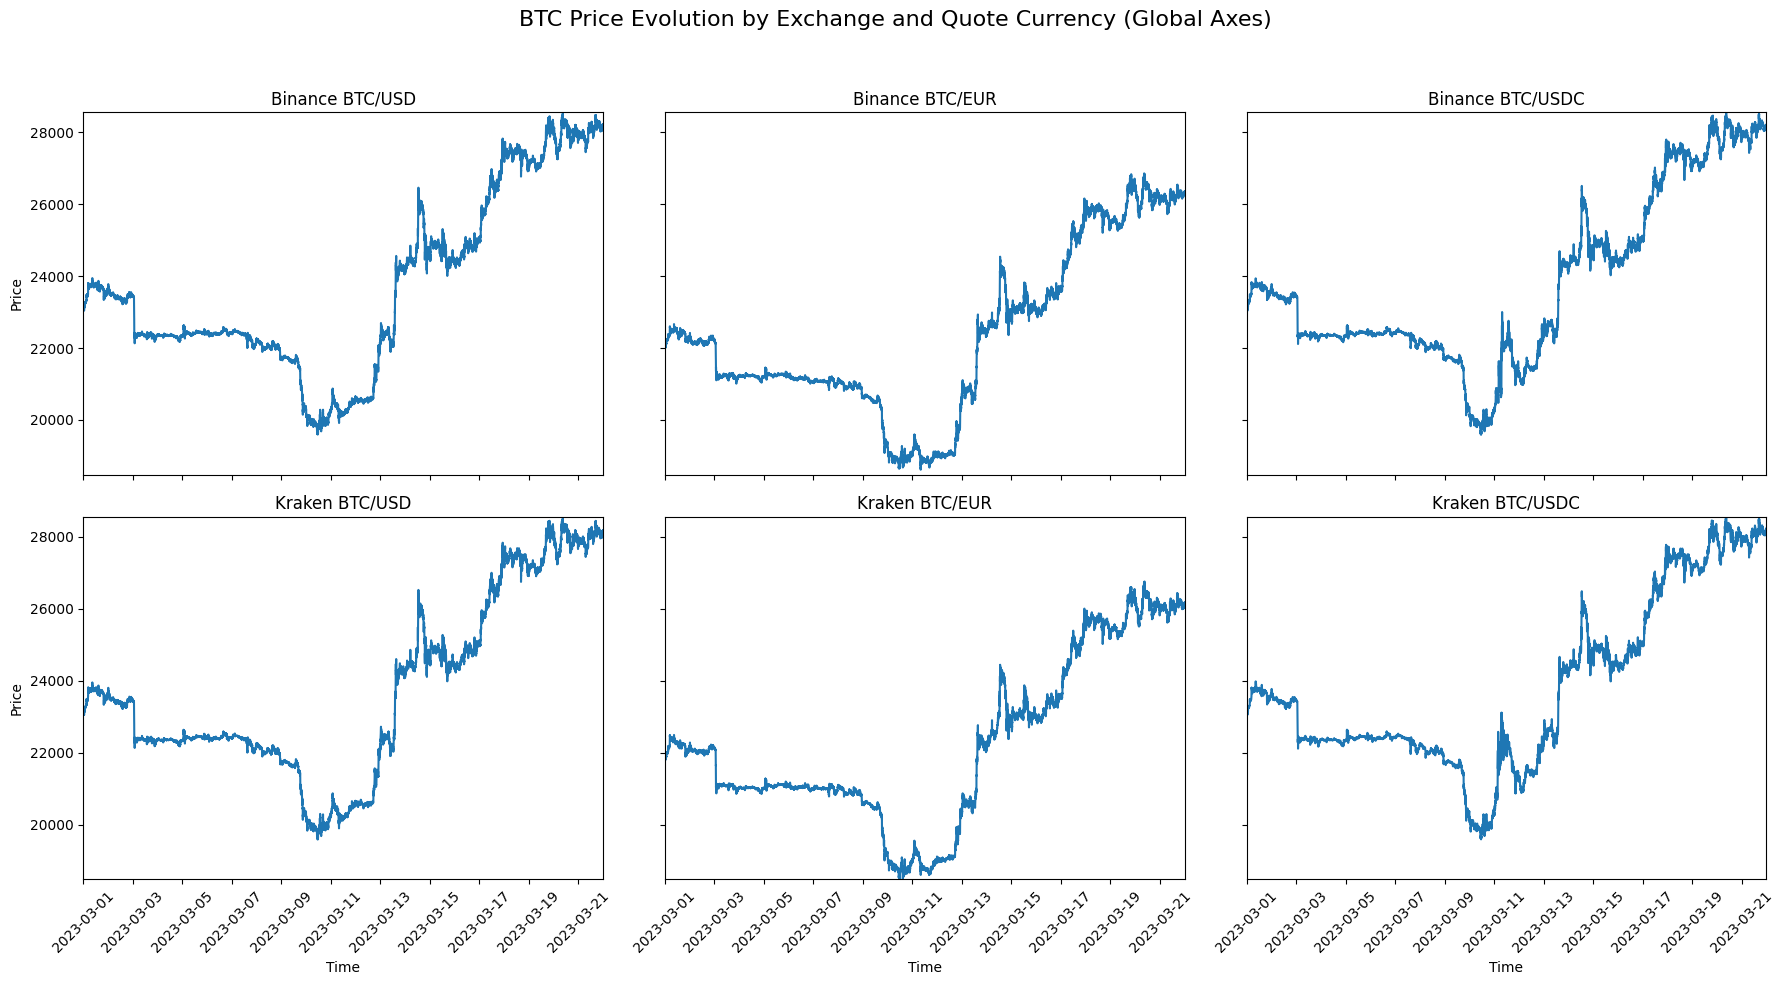

In [7]:
# Plotting price evolution across exchanges and quote currencies
# -------- Global y-axis (price) --------
all_prices = np.concatenate([
    binance_usd["close"], binance_eur["close"], binance_usdc["close"],
    kraken_usd["close"], kraken_eur["close"], kraken_usdc["close"]
])
y_min, y_max = all_prices.min(), all_prices.max()

# -------- Global x-axis (timestamps) --------
all_timestamps = pd.concat([
    binance_usd["timestamp"], binance_eur["timestamp"], binance_usdc["timestamp"],
    kraken_usd["timestamp"], kraken_eur["timestamp"], kraken_usdc["timestamp"]
])
x_min, x_max = all_timestamps.min(), all_timestamps.max()

# -------- Plotting --------
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

# -------- BINANCE (ROW 0) --------
axes[0, 0].plot(binance_usd["timestamp"], binance_usd["close"])
axes[0, 0].set_title("Binance BTC/USD")
axes[0, 0].set_ylabel("Price")
axes[0, 0].set_xlim(x_min, x_max)
axes[0, 0].set_ylim(y_min, y_max)

axes[0, 1].plot(binance_eur["timestamp"], binance_eur["close"])
axes[0, 1].set_title("Binance BTC/EUR")
axes[0, 1].set_xlim(x_min, x_max)
axes[0, 1].set_ylim(y_min, y_max)

axes[0, 2].plot(binance_usdc["timestamp"], binance_usdc["close"])
axes[0, 2].set_title("Binance BTC/USDC")
axes[0, 2].set_xlim(x_min, x_max)
axes[0, 2].set_ylim(y_min, y_max)

# -------- KRAKEN (ROW 1) --------
axes[1, 0].plot(kraken_usd["timestamp"], kraken_usd["close"])
axes[1, 0].set_title("Kraken BTC/USD")
axes[1, 0].set_ylabel("Price")
axes[1, 0].set_xlabel("Time")
axes[1, 0].set_xlim(x_min, x_max)
axes[1, 0].set_ylim(y_min, y_max)

axes[1, 1].plot(kraken_eur["timestamp"], kraken_eur["close"])
axes[1, 1].set_title("Kraken BTC/EUR")
axes[1, 1].set_xlabel("Time")
axes[1, 1].set_xlim(x_min, x_max)
axes[1, 1].set_ylim(y_min, y_max)

axes[1, 2].plot(kraken_usdc["timestamp"], kraken_usdc["close"])
axes[1, 2].set_title("Kraken BTC/USDC")
axes[1, 2].set_xlabel("Time")
axes[1, 2].set_xlim(x_min, x_max)
axes[1, 2].set_ylim(y_min, y_max)

# Rotate x-ticks for readability
for ax in axes.flat:
    ax.tick_params(axis="x", rotation=45)

plt.suptitle("BTC Price Evolution by Exchange and Quote Currency (Global Axes)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


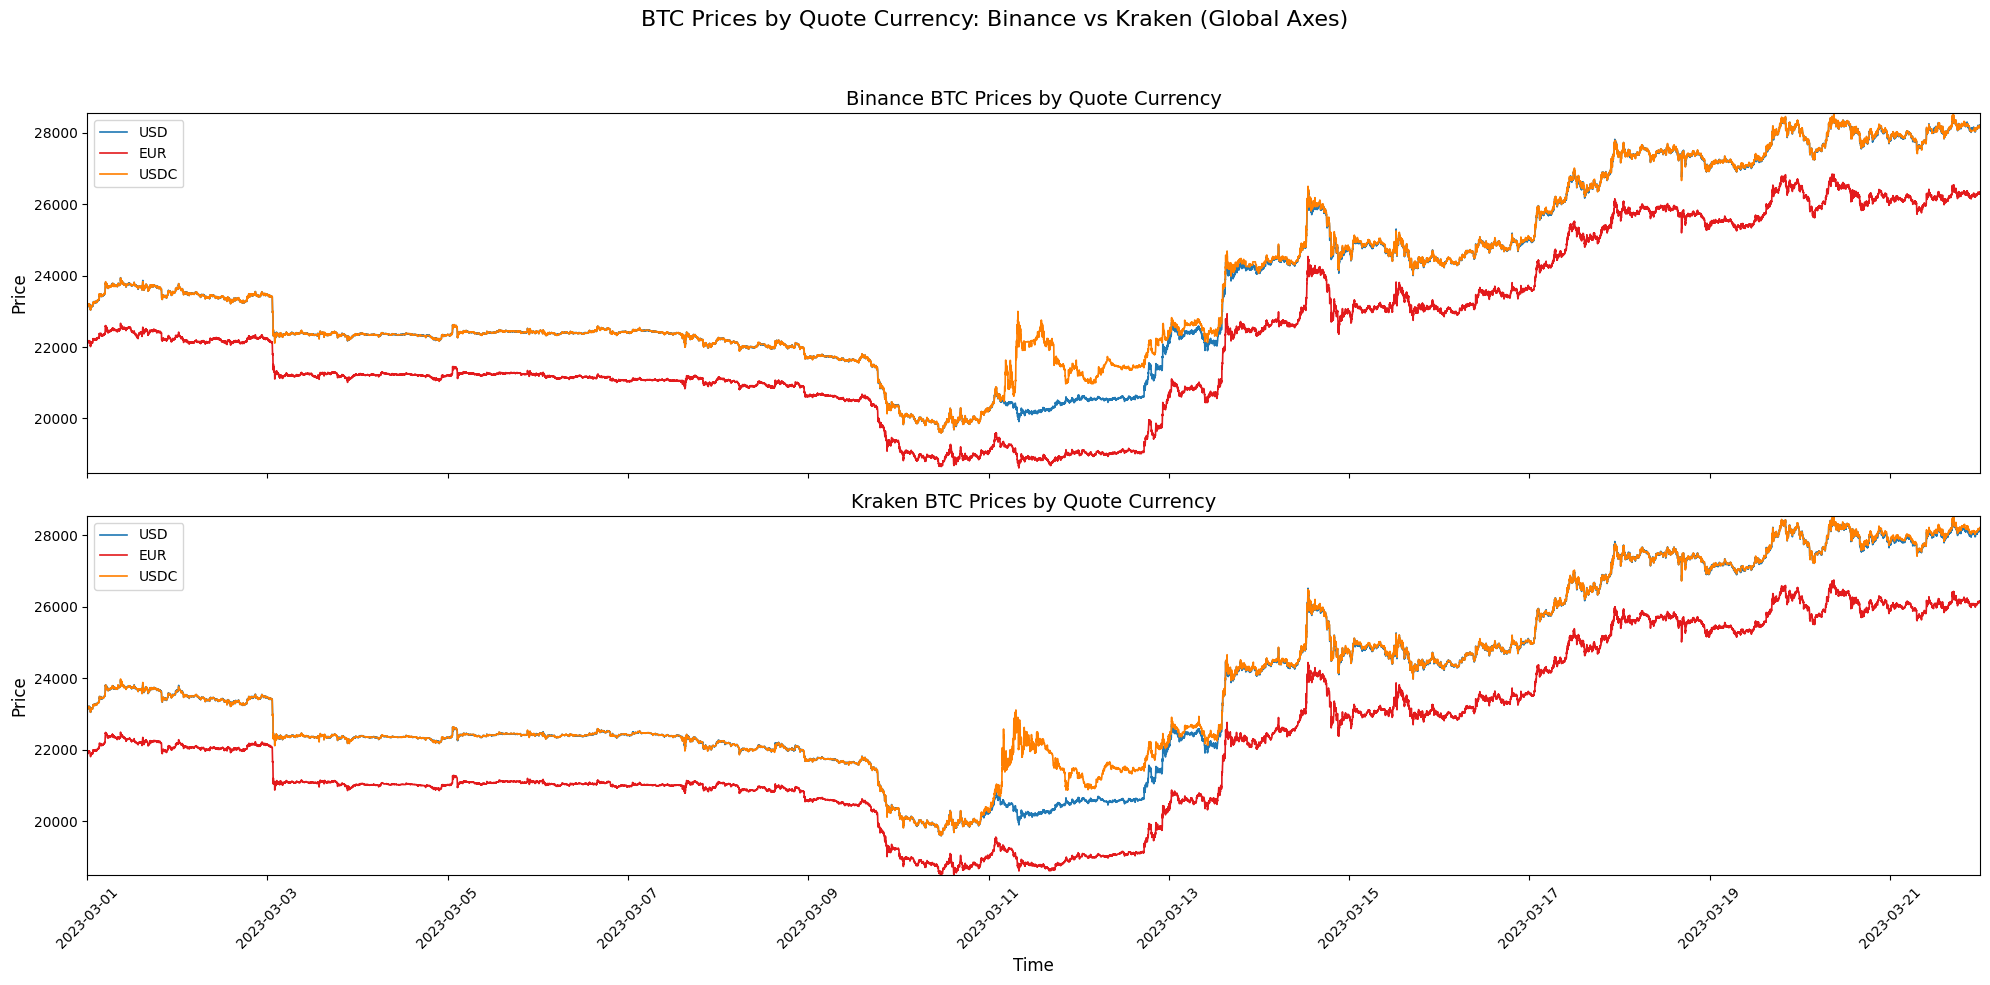

In [8]:
# Plotting prices for each quote currency by exchange
# -------- Global y-axis (price) --------
all_prices = np.concatenate([
    binance_usd["close"], binance_eur["close"], binance_usdc["close"],
    kraken_usd["close"], kraken_eur["close"], kraken_usdc["close"]
])
y_min, y_max = all_prices.min(), all_prices.max()

# -------- Global x-axis (timestamps) --------
all_timestamps = pd.concat([
    binance_usd["timestamp"], binance_eur["timestamp"], binance_usdc["timestamp"],
    kraken_usd["timestamp"], kraken_eur["timestamp"], kraken_usdc["timestamp"]
])
x_min, x_max = all_timestamps.min(), all_timestamps.max()

# -------- Plotting --------
fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)  # 2x1 layout

colors = ["#1f78b4", "#e31a1c", "#ff7f00"]  # USD blue, EUR red, USDC orange

# ---------- BINANCE ----------
axes[0].plot(binance_usd["timestamp"], binance_usd["close"], label="USD", color=colors[0], linewidth=1.2)
axes[0].plot(binance_eur["timestamp"], binance_eur["close"], label="EUR", color=colors[1], linewidth=1.2)
axes[0].plot(binance_usdc["timestamp"], binance_usdc["close"], label="USDC", color=colors[2], linewidth=1.2)

axes[0].set_title("Binance BTC Prices by Quote Currency", fontsize=14)
axes[0].set_ylabel("Price", fontsize=12)
axes[0].legend()
axes[0].tick_params(axis="x", rotation=45)
axes[0].set_ylim(y_min, y_max)
axes[0].set_xlim(x_min, x_max)

# ---------- KRAKEN ----------
axes[1].plot(kraken_usd["timestamp"], kraken_usd["close"], label="USD", color=colors[0], linewidth=1.2)
axes[1].plot(kraken_eur["timestamp"], kraken_eur["close"], label="EUR", color=colors[1], linewidth=1.2)
axes[1].plot(kraken_usdc["timestamp"], kraken_usdc["close"], label="USDC", color=colors[2], linewidth=1.2)

axes[1].set_title("Kraken BTC Prices by Quote Currency", fontsize=14)
axes[1].set_xlabel("Time", fontsize=12)
axes[1].set_ylabel("Price", fontsize=12)
axes[1].legend()
axes[1].tick_params(axis="x", rotation=45)
axes[1].set_ylim(y_min, y_max)
axes[1].set_xlim(x_min, x_max)

plt.suptitle("BTC Prices by Quote Currency: Binance vs Kraken (Global Axes)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


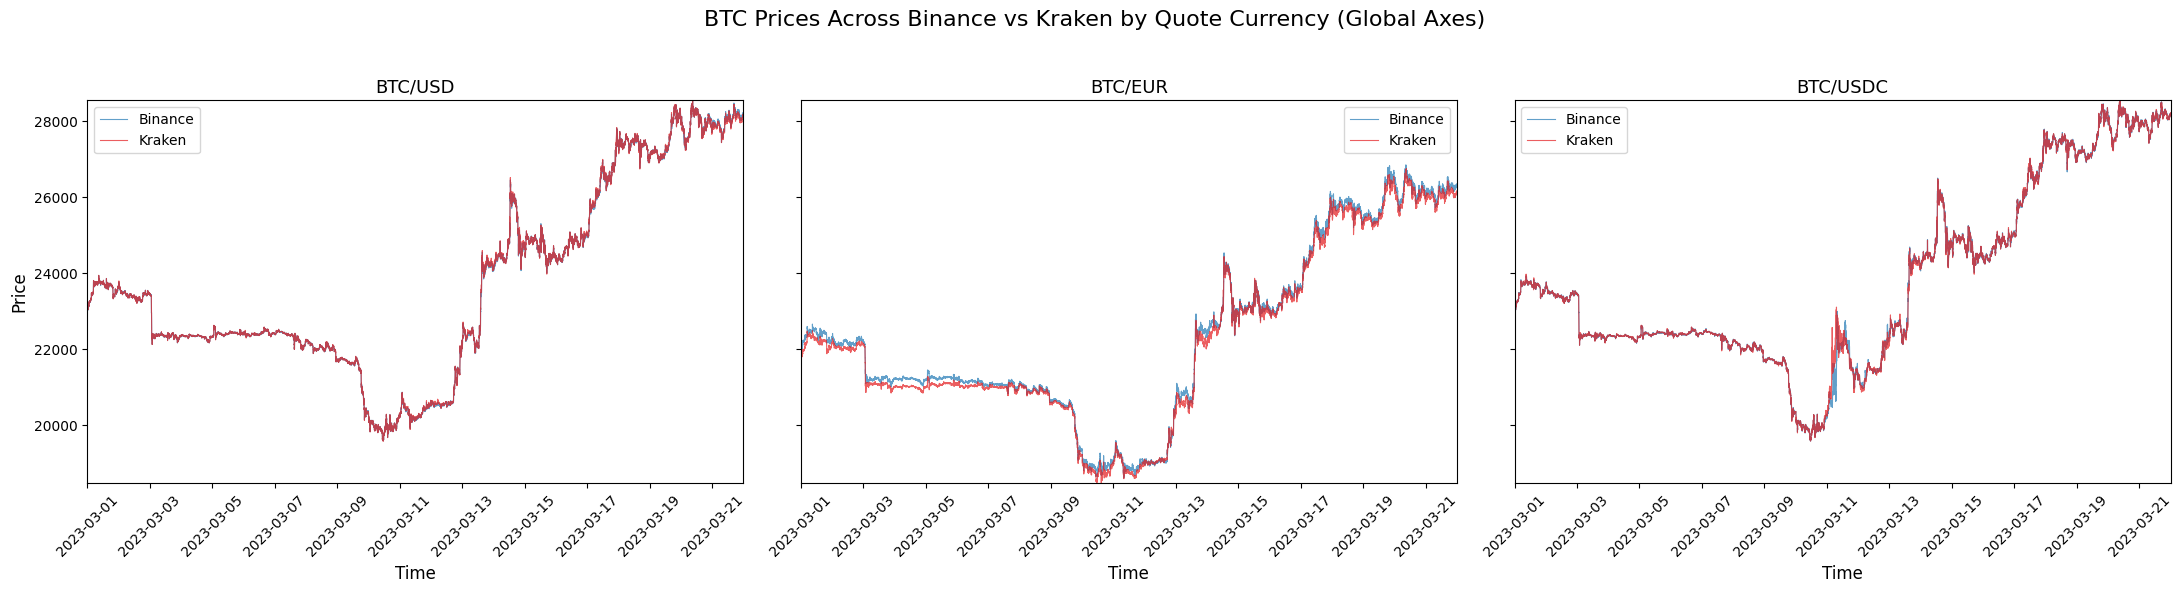

In [9]:
# Plotting prices across exchanges by quote currency
# -------- Global x and y limits --------
# Concatenate all price series
all_prices = np.concatenate([
    binance_usd["close"], kraken_usd["close"],
    binance_eur["close"], kraken_eur["close"],
    binance_usdc["close"], kraken_usdc["close"]
])
y_min, y_max = all_prices.min(), all_prices.max()

# Concatenate all timestamps
all_timestamps = pd.concat([
    binance_usd["timestamp"], kraken_usd["timestamp"],
    binance_eur["timestamp"], kraken_eur["timestamp"],
    binance_usdc["timestamp"], kraken_usdc["timestamp"]
])
x_min, x_max = all_timestamps.min(), all_timestamps.max()

# -------- Plotting --------
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=True)  # 1x3 layout

colors = ["#1f78b4", "#e31a1c"]  # Binance blue, Kraken red

# ---------- BTC/USD ----------
axes[0].plot(binance_usd["timestamp"], binance_usd["close"], label="Binance", color=colors[0], linewidth=0.8, alpha=0.7)
axes[0].plot(kraken_usd["timestamp"], kraken_usd["close"], label="Kraken", color=colors[1], linewidth=0.8, alpha=0.7)
axes[0].set_title("BTC/USD", fontsize=13)
axes[0].set_xlabel("Time", fontsize=12)
axes[0].set_ylabel("Price", fontsize=12)
axes[0].legend()
axes[0].tick_params(axis="x", rotation=45)
axes[0].set_ylim(y_min, y_max)
axes[0].set_xlim(x_min, x_max)

# ---------- BTC/EUR ----------
axes[1].plot(binance_eur["timestamp"], binance_eur["close"], label="Binance", color=colors[0], linewidth=0.8, alpha=0.7)
axes[1].plot(kraken_eur["timestamp"], kraken_eur["close"], label="Kraken", color=colors[1], linewidth=0.8, alpha=0.7)
axes[1].set_title("BTC/EUR", fontsize=13)
axes[1].set_xlabel("Time", fontsize=12)
axes[1].legend()
axes[1].tick_params(axis="x", rotation=45)
axes[1].set_ylim(y_min, y_max)
axes[1].set_xlim(x_min, x_max)

# ---------- BTC/USDC ----------
axes[2].plot(binance_usdc["timestamp"], binance_usdc["close"], label="Binance", color=colors[0], linewidth=0.8, alpha=0.7)
axes[2].plot(kraken_usdc["timestamp"], kraken_usdc["close"], label="Kraken", color=colors[1], linewidth=0.8, alpha=0.7)
axes[2].set_title("BTC/USDC", fontsize=13)
axes[2].set_xlabel("Time", fontsize=12)
axes[2].legend()
axes[2].tick_params(axis="x", rotation=45)
axes[2].set_ylim(y_min, y_max)
axes[2].set_xlim(x_min, x_max)

plt.suptitle("BTC Prices Across Binance vs Kraken by Quote Currency (Global Axes)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


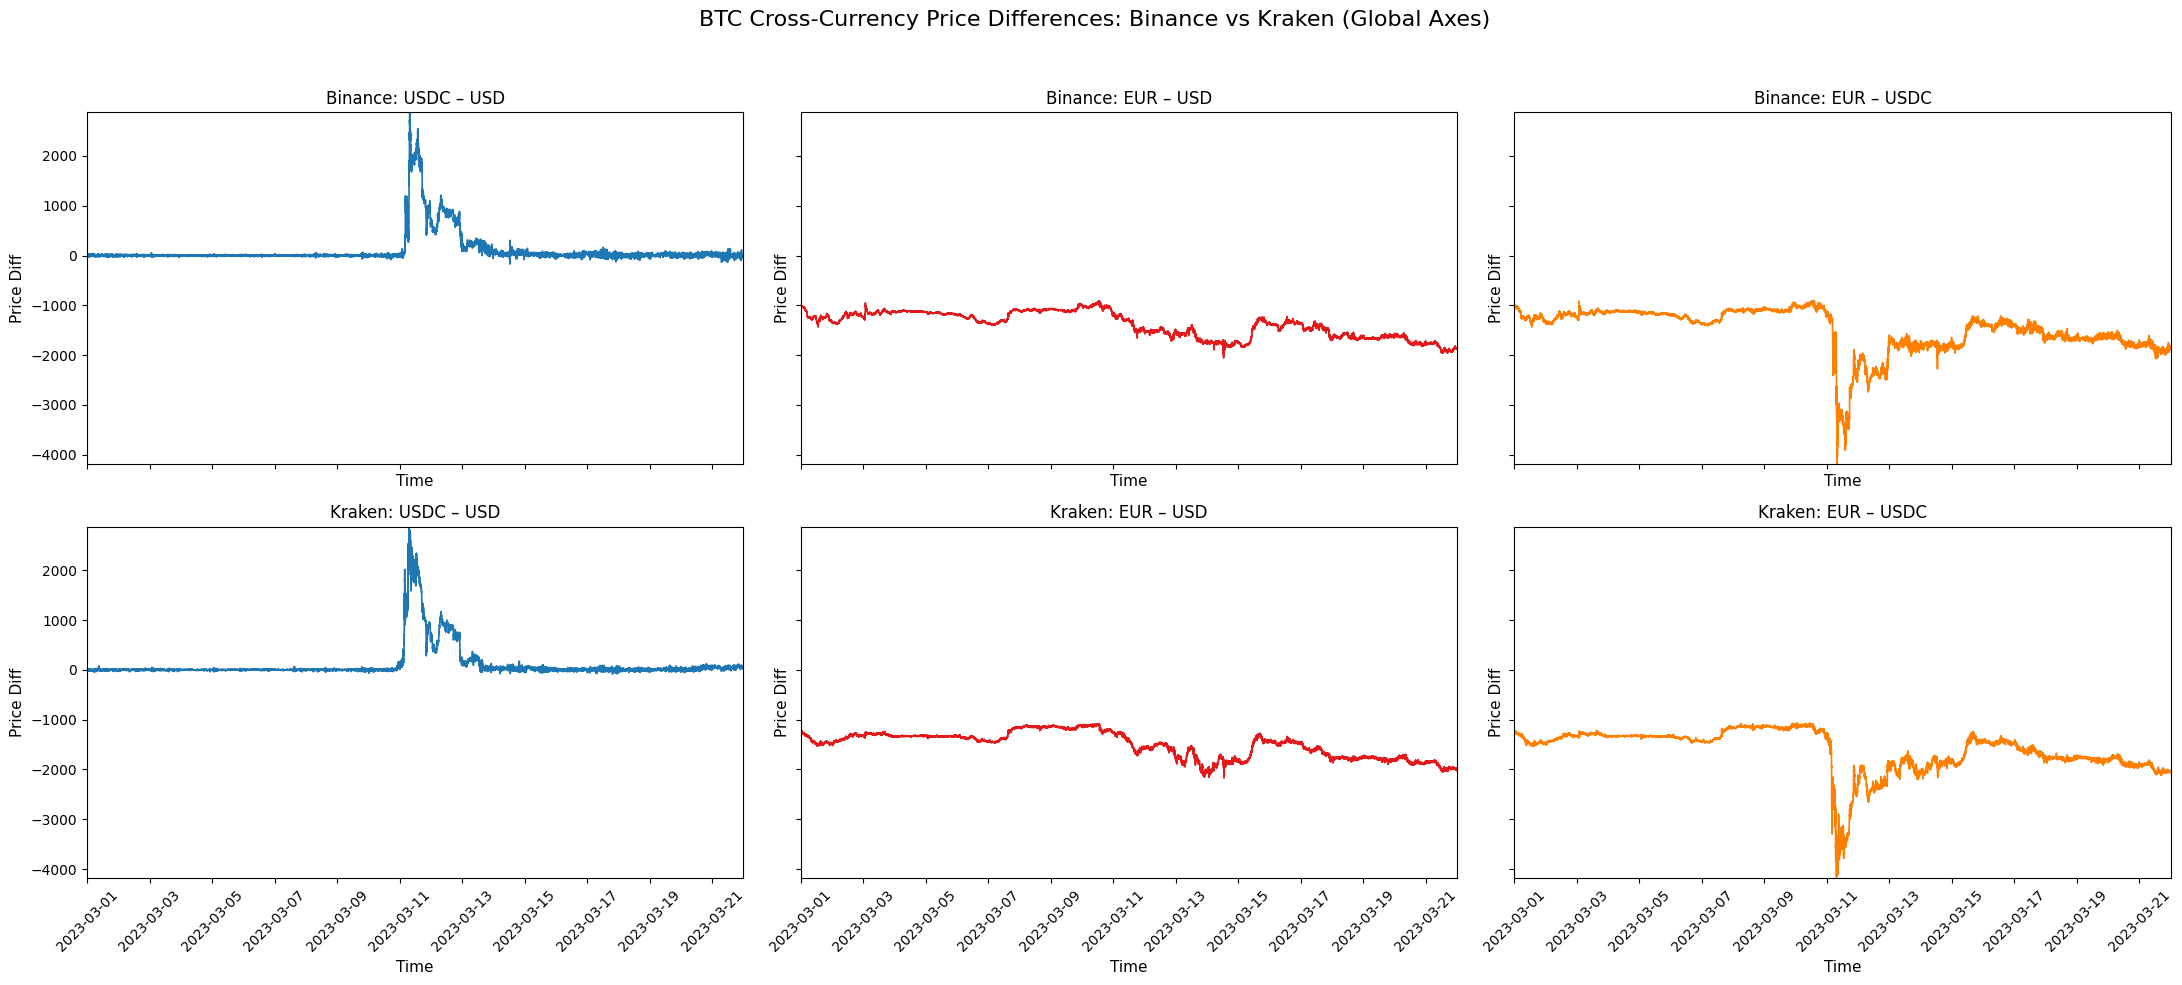

In [10]:
# Plotting price differences between quote currencies for each exchange
# ---------- Ensure timestamps are datetime ----------
for df in [binance_usd, binance_usdc, binance_eur,
           kraken_usd, kraken_usdc, kraken_eur]:
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df.sort_values("timestamp", inplace=True)
    df.reset_index(drop=True, inplace=True)

# ---------- Merge pairs to calculate price differences ----------
def create_price_diff(df1, df2, name1, name2):
    merged = df1.merge(df2, on="timestamp", suffixes=(f"_{name1}", f"_{name2}"))
    merged["price_diff"] = merged[f"close_{name2}"] - merged[f"close_{name1}"]
    return merged

# Binance
binance_usd_usdc = create_price_diff(binance_usd, binance_usdc, "usd", "usdc")
binance_usd_eur  = create_price_diff(binance_usd, binance_eur, "usd", "eur")
binance_usdc_eur = create_price_diff(binance_usdc, binance_eur, "usdc", "eur")

# Kraken
kraken_usd_usdc = create_price_diff(kraken_usd, kraken_usdc, "usd", "usdc")
kraken_usd_eur  = create_price_diff(kraken_usd, kraken_eur, "usd", "eur")
kraken_usdc_eur = create_price_diff(kraken_usdc, kraken_eur, "usdc", "eur")

# ---------- Global axes ranges ----------
all_price_diffs = np.concatenate([
    binance_usd_usdc["price_diff"], binance_usd_eur["price_diff"], binance_usdc_eur["price_diff"],
    kraken_usd_usdc["price_diff"], kraken_usd_eur["price_diff"], kraken_usdc_eur["price_diff"]
])
y_min, y_max = all_price_diffs.min(), all_price_diffs.max()

all_timestamps = pd.concat([
    binance_usd_usdc["timestamp"], binance_usd_eur["timestamp"], binance_usdc_eur["timestamp"],
    kraken_usd_usdc["timestamp"], kraken_usd_eur["timestamp"], kraken_usdc_eur["timestamp"]
])
x_min, x_max = all_timestamps.min(), all_timestamps.max()

# ---------- Plotting ----------
fig, axes = plt.subplots(2, 3, figsize=(22, 10), sharex=True, sharey=True)

colors = ["#1f78b4", "#e31a1c", "#ff7f00"]  # USDC-USD, EUR-USD, EUR-USDC

# ---------- BINANCE ----------
axes[0, 0].plot(binance_usd_usdc["timestamp"], binance_usd_usdc["price_diff"], color=colors[0], linewidth=1.2)
axes[0, 0].set_title("Binance: USDC – USD")

axes[0, 1].plot(binance_usd_eur["timestamp"], binance_usd_eur["price_diff"], color=colors[1], linewidth=1.2)
axes[0, 1].set_title("Binance: EUR – USD")

axes[0, 2].plot(binance_usdc_eur["timestamp"], binance_usdc_eur["price_diff"], color=colors[2], linewidth=1.2)
axes[0, 2].set_title("Binance: EUR – USDC")

# ---------- KRAKEN ----------
axes[1, 0].plot(kraken_usd_usdc["timestamp"], kraken_usd_usdc["price_diff"], color=colors[0], linewidth=1.2)
axes[1, 0].set_title("Kraken: USDC – USD")

axes[1, 1].plot(kraken_usd_eur["timestamp"], kraken_usd_eur["price_diff"], color=colors[1], linewidth=1.2)
axes[1, 1].set_title("Kraken: EUR – USD")

axes[1, 2].plot(kraken_usdc_eur["timestamp"], kraken_usdc_eur["price_diff"], color=colors[2], linewidth=1.2)
axes[1, 2].set_title("Kraken: EUR – USDC")

# ---------- Formatting ----------
for ax in axes.flat:
    ax.set_xlabel("Time", fontsize=11)
    ax.set_ylabel("Price Diff", fontsize=11)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.tick_params(axis="x", rotation=45)

plt.suptitle("BTC Cross-Currency Price Differences: Binance vs Kraken (Global Axes)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


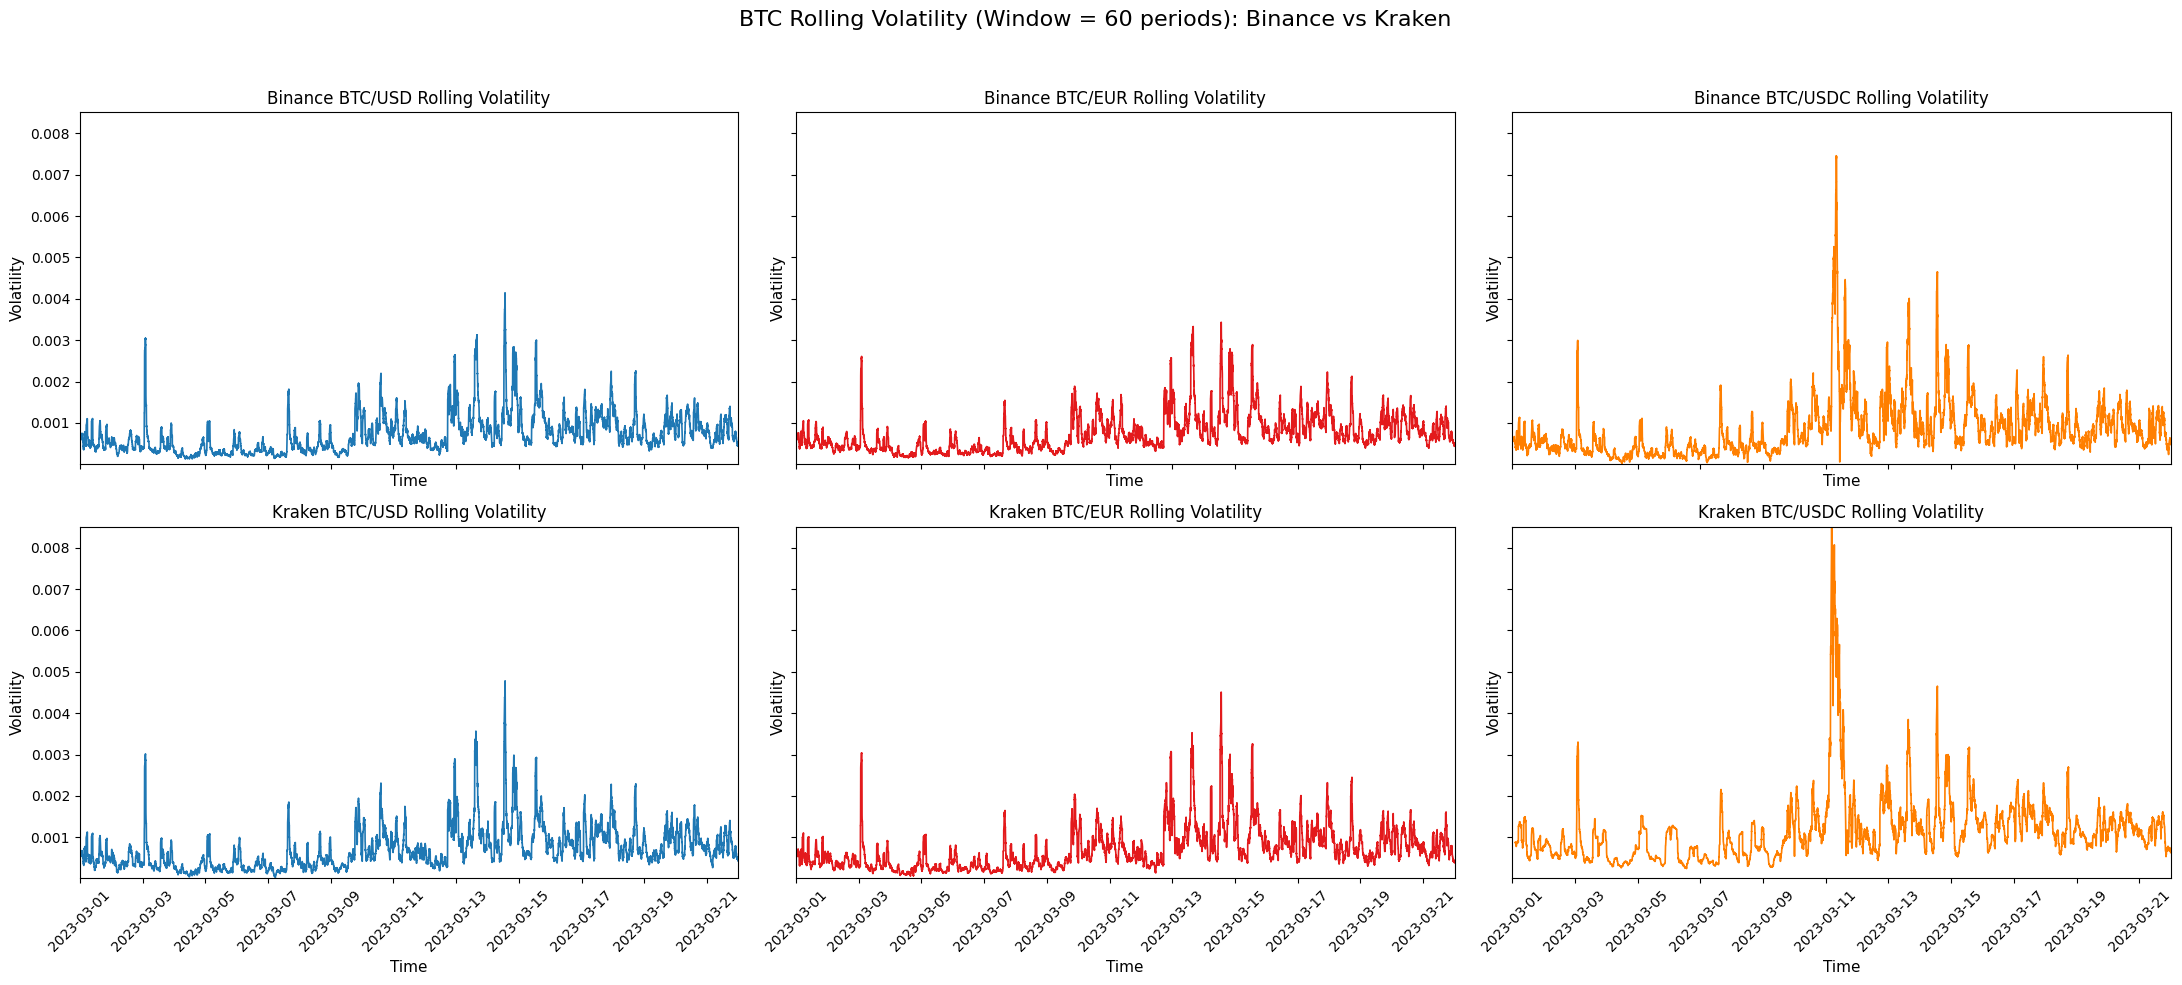

In [11]:
# Plotting rolling volatility across exchanges and quote currencies
window = 60  # rolling window for volatility

# ---------- Compute rolling log returns and volatility ----------
for df in [binance_usd, binance_eur, binance_usdc,
           kraken_usd, kraken_eur, kraken_usdc]:
    df["returns"] = np.log(df["close"]).diff()
    df["volatility"] = df["returns"].rolling(window).std()

# ---------- Determine global x and y axis limits ----------
all_timestamps = pd.concat([
    binance_usd["timestamp"], binance_eur["timestamp"], binance_usdc["timestamp"],
    kraken_usd["timestamp"], kraken_eur["timestamp"], kraken_usdc["timestamp"]
])
x_min, x_max = all_timestamps.min(), all_timestamps.max()

all_volatility = pd.concat([
    binance_usd["volatility"], binance_eur["volatility"], binance_usdc["volatility"],
    kraken_usd["volatility"], kraken_eur["volatility"], kraken_usdc["volatility"]
])
y_min, y_max = all_volatility.min(), all_volatility.max()

# ---------- Plotting ----------
fig, axes = plt.subplots(2, 3, figsize=(22, 10), sharex=True, sharey=True)  # sharey now true for global y-axis
colors = ["#1f78b4", "#e31a1c", "#ff7f00"]  # USD, EUR, USDC

# ---------- BINANCE ----------
axes[0, 0].plot(binance_usd["timestamp"], binance_usd["volatility"], color=colors[0], linewidth=1.2)
axes[0, 0].set_title("Binance BTC/USD Rolling Volatility")

axes[0, 1].plot(binance_eur["timestamp"], binance_eur["volatility"], color=colors[1], linewidth=1.2)
axes[0, 1].set_title("Binance BTC/EUR Rolling Volatility")

axes[0, 2].plot(binance_usdc["timestamp"], binance_usdc["volatility"], color=colors[2], linewidth=1.2)
axes[0, 2].set_title("Binance BTC/USDC Rolling Volatility")

# ---------- KRAKEN ----------
axes[1, 0].plot(kraken_usd["timestamp"], kraken_usd["volatility"], color=colors[0], linewidth=1.2)
axes[1, 0].set_title("Kraken BTC/USD Rolling Volatility")

axes[1, 1].plot(kraken_eur["timestamp"], kraken_eur["volatility"], color=colors[1], linewidth=1.2)
axes[1, 1].set_title("Kraken BTC/EUR Rolling Volatility")

axes[1, 2].plot(kraken_usdc["timestamp"], kraken_usdc["volatility"], color=colors[2], linewidth=1.2)
axes[1, 2].set_title("Kraken BTC/USDC Rolling Volatility")

# ---------- Formatting ----------
for ax in axes.flat:
    ax.set_xlabel("Time", fontsize=11)
    ax.set_ylabel("Volatility", fontsize=11)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.tick_params(axis="x", rotation=45)

plt.suptitle(f"BTC Rolling Volatility (Window = {window} periods): Binance vs Kraken", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


As you can see from the graphs given above, there is a major common spike around the dates of 2023-03-13 to 2023-03-15, with the main spike being on the 14th.
Indicating time varying risk, consistent with the fact that during the observed period, regulation changes affected prices.
With volatility following the given trend: USDT volatility > USD volatility > EUR volatility

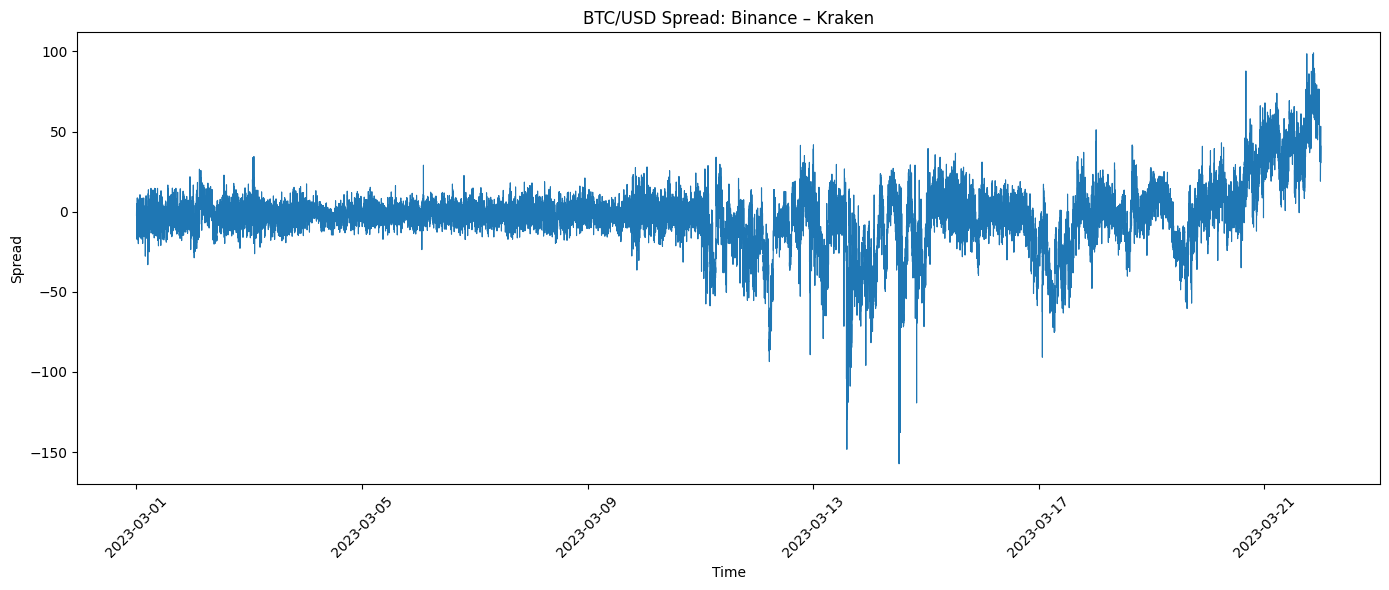

Mean spread: -2.2594993373094785
Spread std: 19.182164030777162


In [12]:
# ---------- Merge datasets on timestamp ----------
binance_usd["timestamp"] = pd.to_datetime(binance_usd["timestamp"])
kraken_usd["timestamp"] = pd.to_datetime(kraken_usd["timestamp"])

usd_merged = pd.merge(
    binance_usd[["timestamp", "close"]],
    kraken_usd[["timestamp", "close"]],
    on="timestamp",
    suffixes=("_binance", "_kraken")
)

# ---------- Compute spread ----------
usd_merged["spread"] = (
    usd_merged["close_binance"] - usd_merged["close_kraken"]
)

# ---------- Plot ----------
plt.figure(figsize=(14,6))
plt.plot(usd_merged["timestamp"], usd_merged["spread"], linewidth=0.8)
plt.title("BTC/USD Spread: Binance – Kraken")
plt.xlabel("Time")
plt.ylabel("Spread")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------- Summary statistics ----------
print("Mean spread:", usd_merged["spread"].mean())
print("Spread std:", usd_merged["spread"].std())


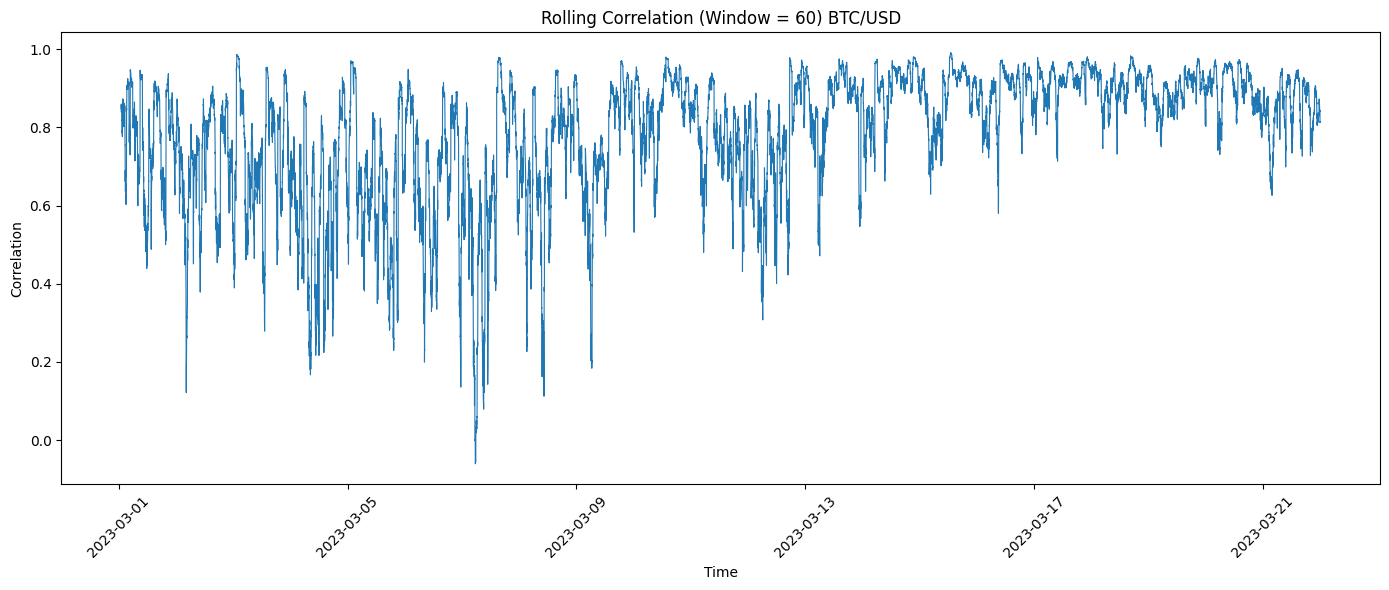

In [13]:
window = 60

usd_merged["return_binance"] = np.log(usd_merged["close_binance"]).diff()
usd_merged["return_kraken"] = np.log(usd_merged["close_kraken"]).diff()

usd_merged["rolling_corr"] = (
    usd_merged["return_binance"]
    .rolling(window)
    .corr(usd_merged["return_kraken"])
)

plt.figure(figsize=(14,6))
plt.plot(usd_merged["timestamp"], usd_merged["rolling_corr"], linewidth=0.8)
plt.title(f"Rolling Correlation (Window = {window}) BTC/USD")
plt.xlabel("Time")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [14]:
from scipy import stats

# Compute rolling vol (if not already done)
window = 60

for df in [binance_usd, kraken_usd]:
    df["returns"] = np.log(df["close"]).diff()
    df["volatility"] = df["returns"].rolling(window).std()

# Drop NaNs
vol_binance = binance_usd["volatility"].dropna()
vol_kraken = kraken_usd["volatility"].dropna()

# Align lengths
min_len = min(len(vol_binance), len(vol_kraken))
vol_binance = vol_binance[-min_len:]
vol_kraken = vol_kraken[-min_len:]

# T-test
t_stat, p_value = stats.ttest_ind(vol_binance, vol_kraken)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 1.0662483160374
P-value: 0.28631567969032884


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

# ---------- Prepare returns ----------
usd_merged["return_binance"] = np.log(usd_merged["close_binance"]).diff()
usd_merged["return_kraken"] = np.log(usd_merged["close_kraken"]).diff()

# Lag kraken
usd_merged["lag_kraken"] = usd_merged["return_kraken"].shift(1)

# Drop NaNs
reg_df = usd_merged.dropna()

X = reg_df[["lag_kraken"]].values
y = reg_df["return_binance"].values

# ---------- Fit regression ----------
model = LinearRegression()
model.fit(X, y)

beta = model.coef_[0]
alpha = model.intercept_

# Predictions
y_pred = model.predict(X)

# ---------- Statistics ----------
r2 = r2_score(y, y_pred)

# Manual t-statistic for beta
residuals = y - y_pred
n = len(y)
sigma2 = np.sum(residuals**2) / (n - 2)
var_beta = sigma2 / np.sum((X.flatten() - X.mean())**2)
t_stat = beta / np.sqrt(var_beta)

p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-2))

print("Alpha:", alpha)
print("Beta (Kraken leads Binance):", beta)
print("R-squared:", r2)
print("t-stat:", t_stat)
print("p-value:", p_value)


Alpha: 6.336160650483151e-06
Beta (Kraken leads Binance): 0.04287884012082763
R-squared: 0.0019140599953051396
t-stat: 7.599882342567051
p-value: 3.042011087472929e-14


In [16]:
usd_merged["lag_binance"] = usd_merged["return_binance"].shift(1)

reg_df = usd_merged.dropna()

X = reg_df[["lag_binance"]].values
y = reg_df["return_kraken"].values

model = LinearRegression()
model.fit(X, y)

beta = model.coef_[0]

print("Beta (Binance leads Kraken):", beta)



Beta (Binance leads Kraken): 0.11350321285295602


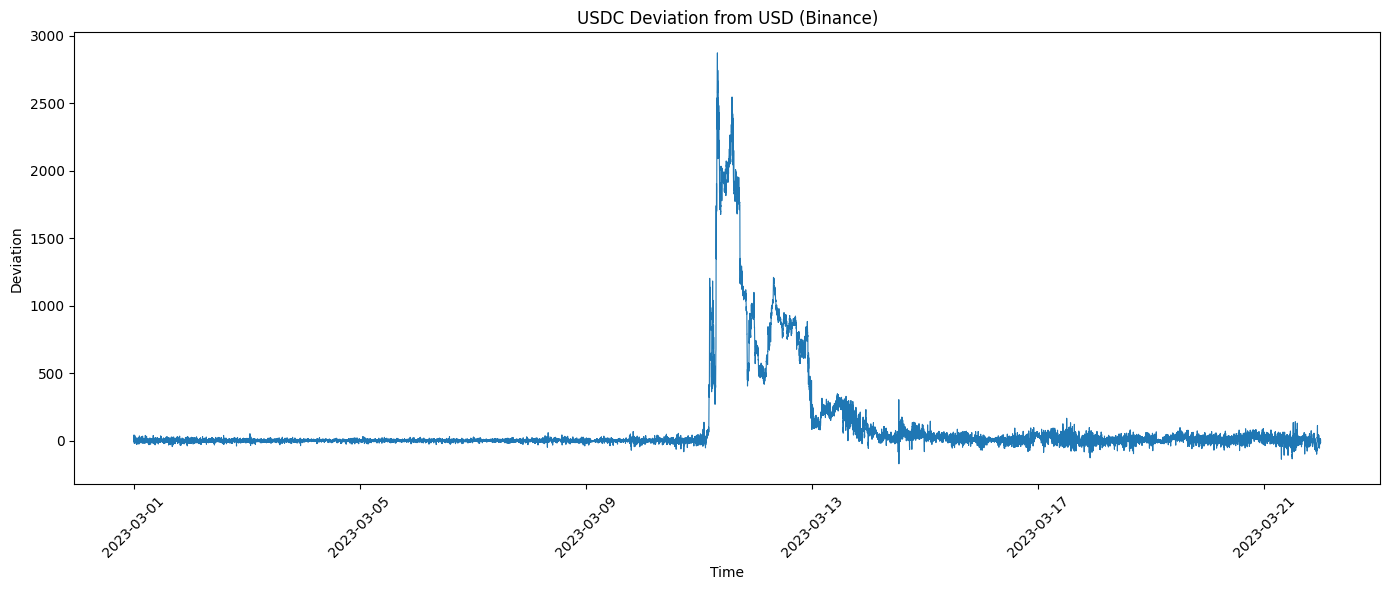

Mean deviation: 106.70722189153443
Max deviation: 2873.9300000000003


In [17]:
# Merge Binance USD and USDC
usdc_merged = pd.merge(
    binance_usd[["timestamp", "close"]],
    binance_usdc[["timestamp", "close"]],
    on="timestamp",
    suffixes=("_usd", "_usdc")
)

usdc_merged["usdc_deviation"] = (
    usdc_merged["close_usdc"] - usdc_merged["close_usd"]
)

plt.figure(figsize=(14,6))
plt.plot(usdc_merged["timestamp"], usdc_merged["usdc_deviation"], linewidth=0.8)
plt.title("USDC Deviation from USD (Binance)")
plt.xlabel("Time")
plt.ylabel("Deviation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Mean deviation:", usdc_merged["usdc_deviation"].mean())
print("Max deviation:", usdc_merged["usdc_deviation"].max())
